In [11]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from utils import plot_mean_bar

# Notebook Settings
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [10, 6]

# 1. Getting to Know the Datasets

# 1.1 Courses Dataset

## 1.1.1 Initial Exploration/Cleaning

In [2]:
courses = pd.read_csv('../courses.csv')

In [3]:
f'The Courses Dataset Contains {courses.shape[0]} lines and {courses.shape[1]} columns'

'The Courses Dataset Contains 22 lines and 3 columns'

In [4]:
courses

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [5]:
courses.dtypes

code_module                   object
code_presentation             object
module_presentation_length     int64
dtype: object

In [6]:
# Cardinality of the Categorical Variables
courses_cardinality = {col:courses[col].nunique() for col in courses}
courses_cardinality

{'code_module': 7, 'code_presentation': 4, 'module_presentation_length': 7}

In [7]:
# Data Cleaning: Splitting code_presentation column into year and starting month code
STARTING_MONTH_MAP = {'B':'February','J':'October'}

courses_clean = (courses
 .assign(year_presentation = lambda df_:df_['code_presentation']
         .str
         .split('([A-Z])',expand = True)[0],
         starting_month = lambda df_:df_['code_presentation']
         .str
         .split('([A-Z])',expand = True)[1])
 .assign(starting_month = lambda df_:df_["starting_month"].map(STARTING_MONTH_MAP))
 .drop(["code_presentation"],axis = 'columns'))

courses_clean.head()

,code_module,module_presentation_length,year_presentation,starting_month
0,AAA,268,2013,October
1,AAA,269,2014,October
2,BBB,268,2013,October
3,BBB,262,2014,October
4,BBB,240,2013,February


# 1.1.2 DataViz

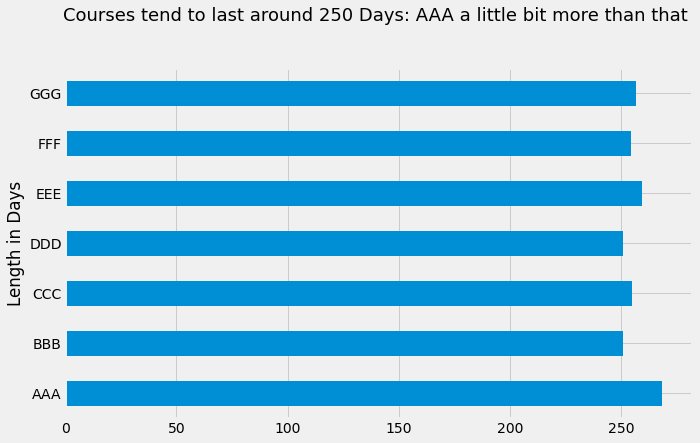

In [8]:
ax = plot_mean_bar(courses_clean,['code_module'],'module_presentation_length')
_= ax.set_ylabel("Length in Days")
_= ax.set_xlabel("")
_= ax.set_title("Courses tend to last around 250 Days: AAA a little bit more than that \n\n", size = 18)

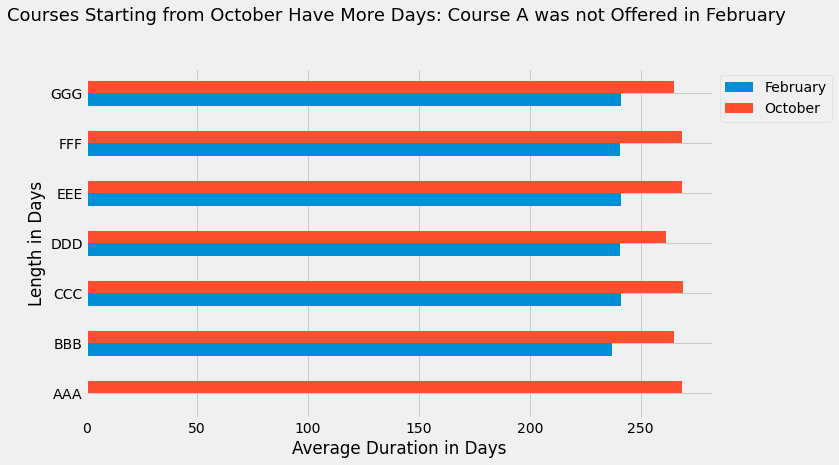

In [9]:
ax = plot_mean_bar(courses_clean,['code_module','starting_month'],'module_presentation_length')
_= ax.set_ylabel("Length in Days")
_= ax.set_xlabel("Average Duration in Days")
_= ax.set_title("Courses Starting from October Have More Days: Course A was not Offered in February \n\n"
                ,size = 18)

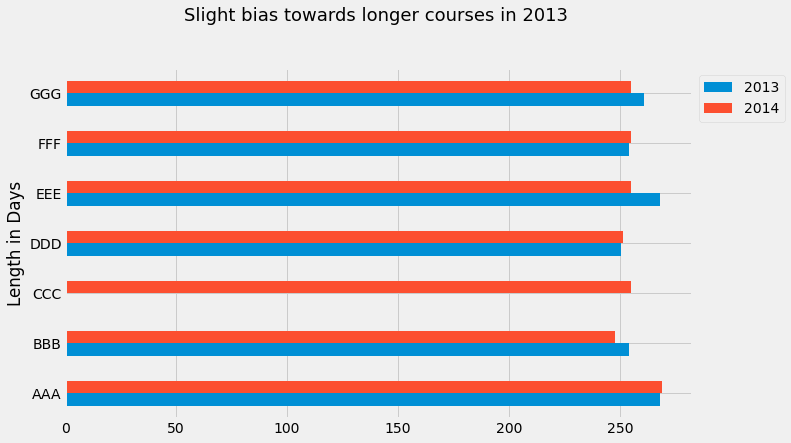

In [10]:
ax = plot_mean_bar(courses_clean,['code_module','year_presentation'],'module_presentation_length')
_= ax.set_ylabel("Length in Days")
_= ax.set_xlabel("")
_= ax.set_title("Slight bias towards longer courses in 2013 \n\n"
                ,size = 18)

# 1.2 Assessments Dataset

## 1.1.1 Initial Exploration/Cleaning

In [14]:
assessments = pd.read_csv('../assessments.csv')

In [15]:
f'The Assessments Dataset Contains {assessments.shape[0]} lines and {assessments.shape[1]} columns'

'The Assessments Dataset Contains 206 lines and 6 columns'

In [16]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [19]:
assessments.dtypes

code_module           object
code_presentation     object
id_assessment          int64
assessment_type       object
date                 float64
weight               float64
dtype: object

In [ ]:
assessments.

In [18]:
assessments.query("code_module == 'AAA'")

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
5,AAA,2013J,1757,Exam,NaN,100.0
6,AAA,2014J,1758,TMA,19.0,10.0
7,AAA,2014J,1759,TMA,54.0,20.0
8,AAA,2014J,1760,TMA,117.0,20.0
9,AAA,2014J,1761,TMA,166.0,20.0


In [20]:
assessments.query("code_module == 'BBB'")

,code_module,code_presentation,id_assessment,assessment_type,date,weight
12,BBB,2013B,14991,CMA,54.0,1.0
13,BBB,2013B,14992,CMA,89.0,1.0
14,BBB,2013B,14993,CMA,124.0,1.0
15,BBB,2013B,14994,CMA,159.0,1.0
16,BBB,2013B,14995,CMA,187.0,1.0
17,BBB,2013B,14984,TMA,19.0,5.0
18,BBB,2013B,14985,TMA,47.0,18.0
19,BBB,2013B,14986,TMA,89.0,18.0
20,BBB,2013B,14987,TMA,124.0,18.0
21,BBB,2013B,14988,TMA,159.0,18.0
